<a href="https://colab.research.google.com/github/gmnvh/ai/blob/main/Tensor_Flow_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression with TensorFlow

## Objective for this Notebook

1. What is Linear Regression
2. Linear Regression with TensorFlow.

---

## Linear Regression

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression.
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

𝑌=𝑎𝑋+𝑏
 
Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first import the required packages:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

tf.__version__

'2.4.1'

Let's define the independent variable:

In [5]:
X = np.arange(0.0, 5.0, 0.1)
tf.print(X)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])


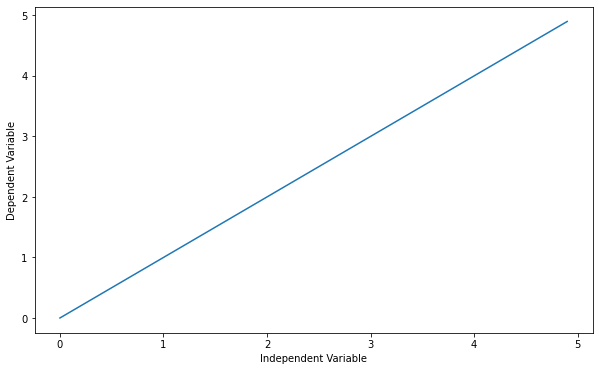

In [7]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:

$𝐷𝑖𝑠𝑡𝑎𝑛𝑐𝑒𝑇𝑟𝑎𝑣𝑒𝑙𝑒𝑑=𝑆𝑝𝑒𝑒𝑑 * 𝑇𝑖𝑚𝑒+𝐼𝑛𝑖𝑡𝑖𝑎𝑙𝐷𝑖𝑠𝑡𝑎𝑛𝑐𝑒$
$𝑆𝑝𝑒𝑒𝑑=𝐴𝑐𝑐𝑒𝑙𝑒𝑟𝑎𝑡𝑖𝑜𝑛*𝑇𝑖𝑚𝑒+𝐼𝑛𝑖𝑡𝑖𝑎𝑙𝑆𝑝𝑒𝑒𝑑$

They are also used to describe properties of different materials:

$𝐹𝑜𝑟𝑐𝑒=𝐷𝑒𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛*𝑆𝑡𝑖𝑓𝑓𝑛𝑒𝑠𝑠$
$𝐻𝑒𝑎𝑡𝑇𝑟𝑎𝑛𝑠𝑓𝑒𝑟𝑒𝑑=𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑒𝐷𝑖𝑓𝑓𝑒𝑟𝑒𝑛𝑐𝑒*𝑇ℎ𝑒𝑟𝑚𝑎𝑙𝐶𝑜𝑛𝑑𝑢𝑐𝑡𝑖𝑣𝑖𝑡𝑦$
$𝐸𝑙𝑒𝑐𝑡𝑟𝑖𝑐𝑎𝑙𝑇𝑒𝑛𝑠𝑖𝑜𝑛(𝑉𝑜𝑙𝑡𝑎𝑔𝑒)=𝐸𝑙𝑒𝑐𝑡𝑟𝑖𝑐𝑎𝑙𝐶𝑢𝑟𝑟𝑒𝑛𝑡*𝑅𝑒𝑠𝑖𝑠𝑡𝑎𝑛𝑐𝑒$
$𝑀𝑎𝑠𝑠=𝑉𝑜𝑙𝑢𝑚𝑒*𝐷𝑒𝑛𝑠𝑖𝑡𝑦$

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

---

## Linear Regression with TensorFlow
A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.
For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars.

In [8]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-04-15 17:13:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   196KB/s    in 0.4s    

2021-04-15 17:13:26 (196 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Understanding the Data
FuelConsumption.csv:

We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [9]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [10]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables a and b, with any random guess, and then we define the linear function:

In [11]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [12]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [13]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

Lets plot the loss values to see how it has changed during the training:

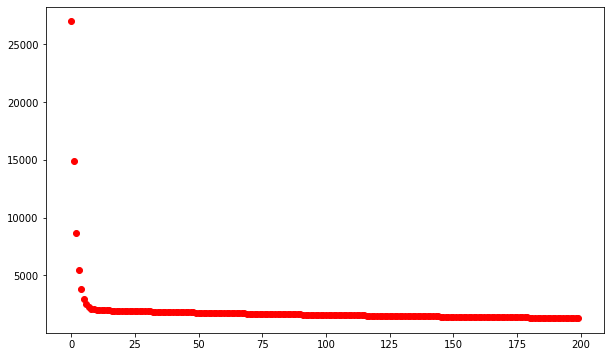

In [14]:
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

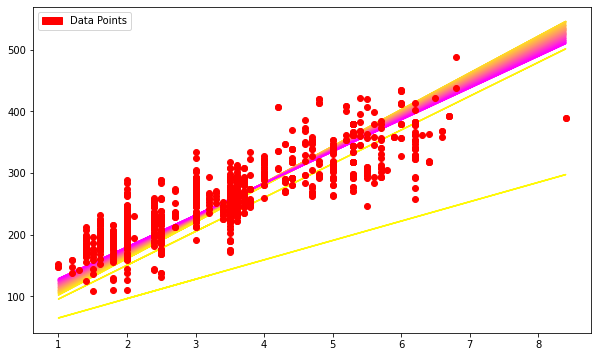

In [15]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()